In [58]:
%load_ext autoreload
%autoreload 2
from lib.preamble import *

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
paths = glob("../data/*AFM*/*/*.npy")

def load(path):
    data = np.load(path)
    ar = xr.DataArray(
        data,
        # images are 20x20 um
        coords={
            "x": np.linspace(0, 20, data.shape[0]),
            "y": np.linspace(0, 20, data.shape[1]),
        },
    )
    ar.name = get_name(path)
    return ar

data = [load(p) for p in paths]

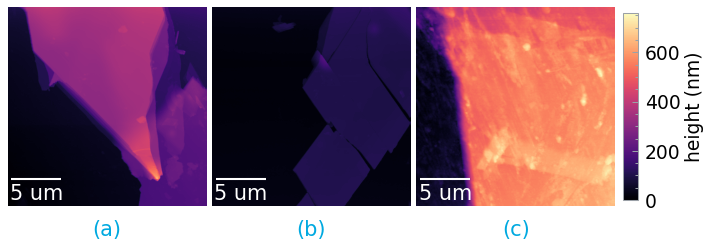

In [70]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


sel = data
sel[0].attrs["label"] = "(c)"
sel[1].attrs["label"] = "(b)"
sel[2].attrs["label"] = "(a)"

sel = sel[::-1]

fig, axs = plt.subplots(1, len(sel), figsize=(5, 2.5))
for ax, d in zip(axs, sel):
    img = ax.imshow(
        d* 1e9, extent=[d.x.min(), d.x.max(), d.y.min(), d.y.max()], 
        vmin=0, vmax=np.max([d.max() for d in sel]) * 1e9, 
        # cmap=CMAP
    )
   
    # plt.colorbar(
    #     img, ax=ax, label="height (nm)",
    #     orientation="horizontal",
    #     fraction=0.046, pad=0.04
    # )
    
    # ax.title.set_text(d.label)
    # ax.title.fontsize = FONTSIZE
    # ax.title.set_color(SEEBLAU)
    ax.text(
        0.5, -0.07, d.label, 
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        fontsize=FONTSIZE,
        color=SEEBLAU,
        # fontweight='bold'
    )

    ax.axis("off")
    scalebar = AnchoredSizeBar(ax.transData,
		5, '5 um', 'lower left', 
    	frameon=False,
		pad=0,
		# size_vertical=1,
        color="white"
	)
    ax.add_artist(scalebar)
    
plt.tight_layout()
# create axs for colorbar
fig.subplots_adjust(right=0.85-.01, wspace=0.03)

cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5])
fig.colorbar(
    mappable=img,
    # ax=axs.ravel().tolist(),
    cax=cbar_ax,
    label="height (nm)",
    pad=0.1,
    fraction=.05,

).set_label("height (nm)")


plt.savefig("../report/figures/2024-02-29 afm.pdf")

plt.show()

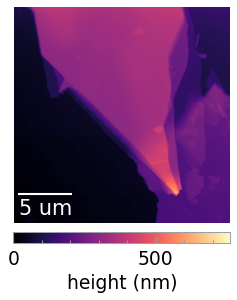

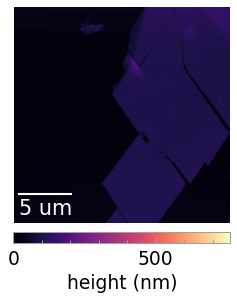

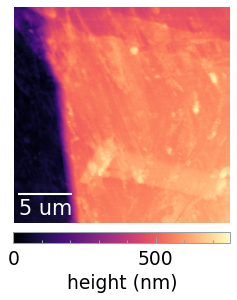

In [108]:
for d in sel:
	plt.figure(figsize=(1.8,2.2))
	ax = plt.gca()
	img = ax.imshow(d*1e9, 
			vmax=np.max([d.max() for d in sel]) * 1e9,
			aspect="equal",
			extent=[d.x.min(), d.x.max(), d.y.min(), d.y.max()]
		)
	scalebar = AnchoredSizeBar(ax.transData,
		5, '5 um', 'lower left', 
		frameon=False,
		# pad=0,
		# size_vertical=1,
		color="white"
	)
	ax.add_artist(scalebar)
	plt.colorbar(img, label="height (nm)", orientation="horizontal", fraction=0.046, pad=0.04)
	plt.axis("off")
	plt.savefig(f"../report/figures/2024-04-19 AFM {d.label}.pdf")
	